### Calcular randoms como siempre pero recortar a ojo para la correlación con deflectantes y no deflectantes

In [33]:
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
import healpy as hp
from astropy.io import ascii
import treecorr
import matplotlib.pyplot as plt
from auger_tools import generate_RandomCatalogue

# Read UHECR data
events_a8 = ascii.read('../data/Auger/events_a8_lb.dat')
eve = SkyCoord(events_a8['RA'], events_a8['dec'], frame='icrs', unit='degree')
mask_eve = np.where(abs(eve.galactic.b) > 5. * u.degree)[0]
events_a8 = events_a8[mask_eve]#[:10000]

# Read galaxy data
gxs = ascii.read('../data/VLS_ang5_cz_700control_def.txt')
gxs = gxs[gxs['cz'] > 1000.]
data = gxs

nmult = 10

# Calculations
ecat = treecorr.Catalog(ra=events_a8['RA'], dec=events_a8['dec'], ra_units='deg', dec_units='deg')
#seeds = np.linspace(1000,1+params['nquant']-1,params['nquant'],dtype=int)

# Generate ra_rand and dec_rand for rcat
ra_rand, dec_rand = generate_RandomCatalogue(data['_RAJ2000'], data['_DEJ2000'], nmult=nmult)

# Correctly create the random catalog
rcat = treecorr.Catalog(ra=ra_rand, dec=dec_rand, ra_units='deg', dec_units='deg')

print(len(data),len(ra_rand),len(events_a8))

1400 14000 29481


3.1402697392471346 -3.1414971551320696
3.1402697392471346 -3.1414971551320696


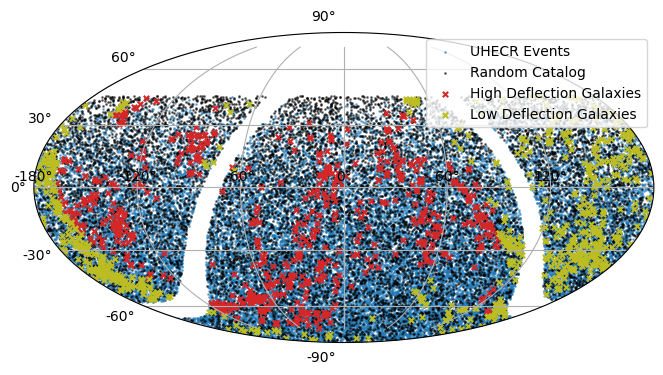

In [34]:

# Create figure with three Mollweide subplots
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'mollweide'}, figsize=(8, 6))

def format_axes(ax):
    """Format axes with RA in hours and Dec in degrees."""
    # RA ticks every 60 degrees (converted to hours)
    xticks_deg = np.arange(-180, 180, 60)
    xticks_rad = np.radians(xticks_deg)# - np.pi # Shift RA to center at 180 degrees
    xtick_labels = [f'{int(deg/15)}h' for deg in xticks_deg]
    ax.set_xticks(xticks_rad)
    ax.set_xticklabels([f'{deg}°' for deg in xticks_deg])
    
    # Dec ticks every 30 degrees
    yticks_deg = np.arange(-90, 91, 30)
    yticks_rad = np.radians(yticks_deg)
    ax.set_yticks(yticks_rad)
    ax.set_yticklabels([f'{deg}°' for deg in yticks_deg])
    ax.grid(True)


# Plot UHECR Events (ecat)
ra_ecat = events_a8['RA']
dec_ecat = events_a8['dec']
ra_ecat[ra_ecat > 180.] = ra_ecat[ra_ecat > 180.] - 360.
ra_rad_ecat = np.radians(ra_ecat)# - np.pi
dec_rad_ecat = np.radians(dec_ecat)
ax.scatter(ra_rad_ecat, dec_rad_ecat, s=1, color='C00', alpha=0.5, label='UHECR Events')
#ax.set_title('UHECR Events (ecat)', pad=20)
#format_axes(axes[1])

# Plot Random Catalog (rcat)
ra_rcat = ra_rand
dec_rcat = dec_rand
ra_rcat[ra_rcat > 180.] = ra_rcat[ra_rcat > 180.] - 360.
ra_rad_rcat = np.radians(ra_rcat)# - np.pi
dec_rad_rcat = np.radians(dec_rcat)
ax.scatter(ra_rad_rcat, dec_rad_rcat, s=1, color='k', alpha=.5, label='Random Catalog')
#ax.set_title('Random Catalog (rcat)', pad=20)
print(np.radians(ra_rcat.max()), np.radians(ra_rcat.min()))
print(ra_rad_rcat.max(), ra_rad_rcat.min())

# Plot Galaxy Data
ra_data_def = data['_RAJ2000'][gxs['deflection'] > 25.]
dec_data_def = data['_DEJ2000'][gxs['deflection'] > 25.]
ra_data_nodef = data['_RAJ2000'][gxs['deflection'] <= 25.]
dec_data_nodef = data['_DEJ2000'][gxs['deflection'] <= 25.]

ra_data_def[ra_data_def > 180.] = ra_data_def[ra_data_def > 180.] - 360.
ra_data_nodef[ra_data_nodef > 180.] = ra_data_nodef[ra_data_nodef > 180.] - 360.

ra_rad_def_data = np.radians(ra_data_def)# - np.pi
dec_rad_def_data = np.radians(dec_data_def)

ra_rad_nodef_data = np.radians(ra_data_nodef)# - np.pi
dec_rad_nodef_data = np.radians(dec_data_nodef)

ax.scatter(ra_rad_def_data, dec_rad_def_data, s=15, color='C03', marker='x', alpha=1, label='High Deflection Galaxies')
ax.scatter(ra_rad_nodef_data, dec_rad_nodef_data, s=15, color='C08', marker='x', alpha=1, label='Low Deflection Galaxies')
#ax.set_title('Galaxy Data', pad=20)

plt.legend(loc='upper right', fontsize=10)
format_axes(ax)
#plt.tight_layout()
plt.show()


### Cortes adicionales

Pre cut:
High deflection gxs:  658
Low deflection gxs:  742
Post cut:
High deflection gxs:  620
Low deflection gxs:  120


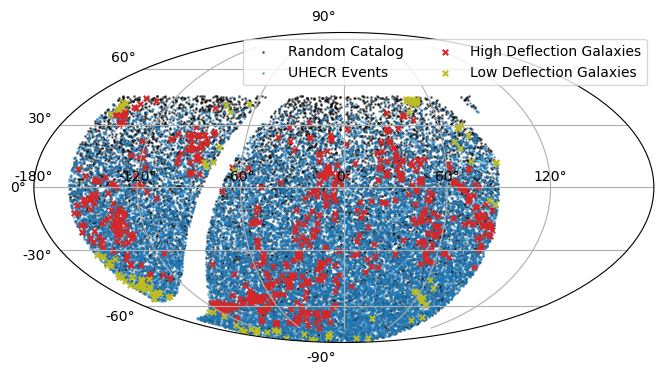

In [35]:

# Create figure with three Mollweide subplots
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'mollweide'}, figsize=(8, 6))

def format_axes(ax):
    """Format axes with RA in hours and Dec in degrees."""
    # RA ticks every 60 degrees (converted to hours)
    xticks_deg = np.arange(-180, 180, 60)
    xticks_rad = np.radians(xticks_deg)# - np.pi # Shift RA to center at 180 degrees
    xtick_labels = [f'{int(deg/15)}h' for deg in xticks_deg]
    ax.set_xticks(xticks_rad)
    ax.set_xticklabels([f'{deg}°' for deg in xticks_deg])
    
    # Dec ticks every 30 degrees
    yticks_deg = np.arange(-90, 91, 30)
    yticks_rad = np.radians(yticks_deg)
    ax.set_yticks(yticks_rad)
    ax.set_yticklabels([f'{deg}°' for deg in yticks_deg])
    ax.grid(True)


# Cut UHECR Events (ecat)
ra_ecat = events_a8['RA']
dec_ecat = events_a8['dec']
ra_ecat[ra_ecat > 180.] = ra_ecat[ra_ecat > 180.] - 360.
ra_rad_ecat = np.radians(ra_ecat)# - np.pi
dec_rad_ecat = np.radians(dec_ecat)

# Cut Random Catalog (rcat)
ra_rcat = ra_rand
dec_rcat = dec_rand
ra_rcat[ra_rcat > 180.] = ra_rcat[ra_rcat > 180.] - 360.
ra_rad_rcat = np.radians(ra_rcat)# - np.pi
dec_rad_rcat = np.radians(dec_rcat)

# Cut Galaxy Data
ra_data_def = data['_RAJ2000'][gxs['deflection'] > 25.]
dec_data_def = data['_DEJ2000'][gxs['deflection'] > 25.]
ra_data_nodef = data['_RAJ2000'][gxs['deflection'] <= 25.]
dec_data_nodef = data['_DEJ2000'][gxs['deflection'] <= 25.]

print('Pre cut:')
print('High deflection gxs: ',len(gxs[gxs['deflection']>25.]))
print('Low deflection gxs: ',len(gxs[gxs['deflection']<=25.]))

ra_data_def[ra_data_def > 180.] = ra_data_def[ra_data_def > 180.] - 360.
ra_data_nodef[ra_data_nodef > 180.] = ra_data_nodef[ra_data_nodef > 180.] - 360.

ra_rad_def_data = np.radians(ra_data_def)# - np.pi
dec_rad_def_data = np.radians(dec_data_def)

ra_rad_nodef_data = np.radians(ra_data_nodef)# - np.pi
dec_rad_nodef_data = np.radians(dec_data_nodef)


# Additional cuts - Create SEPARATE masks for each dataset
# For High Deflection Galaxies
ra_min = -160
ra_max = 90
mask_def = (ra_rad_def_data > np.radians(ra_min))&(ra_rad_def_data < np.radians(ra_max))
ra_rad_def_data = ra_rad_def_data[mask_def]
dec_rad_def_data = dec_rad_def_data[mask_def]

# For Low Deflection Galaxies (use THEIR OWN RA values)
mask_nodef = (ra_rad_nodef_data > np.radians(ra_min))&(ra_rad_nodef_data < np.radians(ra_max))
ra_rad_nodef_data = ra_rad_nodef_data[mask_nodef]
dec_rad_nodef_data = dec_rad_nodef_data[mask_nodef]

# For Random Catalog (rcat)
mask_rcat = (ra_rad_rcat > np.radians(ra_min))&(ra_rad_rcat < np.radians(ra_max))
ra_rad_rcat = ra_rad_rcat[mask_rcat]
dec_rad_rcat = dec_rad_rcat[mask_rcat]

# For UHECR Events (ecat)
mask_ecat = (ra_rad_ecat > np.radians(ra_min))&(ra_rad_ecat < np.radians(ra_max))
ra_rad_ecat = ra_rad_ecat[mask_ecat]
dec_rad_ecat = dec_rad_ecat[mask_ecat]

print('Post cut:')
print('High deflection gxs: ',len(ra_rad_def_data))
print('Low deflection gxs: ',len(ra_rad_nodef_data))

# Plot
ax.scatter(ra_rad_rcat, dec_rad_rcat, s=1, color='k', alpha=.5, label='Random Catalog')
ax.scatter(ra_rad_ecat, dec_rad_ecat, s=1, color='C00', alpha=0.5, label='UHECR Events')
ax.scatter(ra_rad_def_data, dec_rad_def_data, s=15, color='C03', marker='x', alpha=1, label='High Deflection Galaxies')
ax.scatter(ra_rad_nodef_data, dec_rad_nodef_data, s=15, color='C08', marker='x', alpha=1, label='Low Deflection Galaxies')

plt.legend(loc='upper right', fontsize=10, ncol=2)
format_axes(ax)
#plt.tight_layout()
plt.show()


#### Quiero replicar este código pero con dos plots: izq. gxs low deflection, der. gxs high deflection

Mean deflection: 23.43 degrees

Full galaxy data:
    High deflection galaxies: 698
    Low deflection galaxies: 702

High deflection region:
    High deflection galaxies: 636
    Low deflection galaxies: 104

Low deflection region:
    High deflection galaxies: 62
    Low deflection galaxies: 598



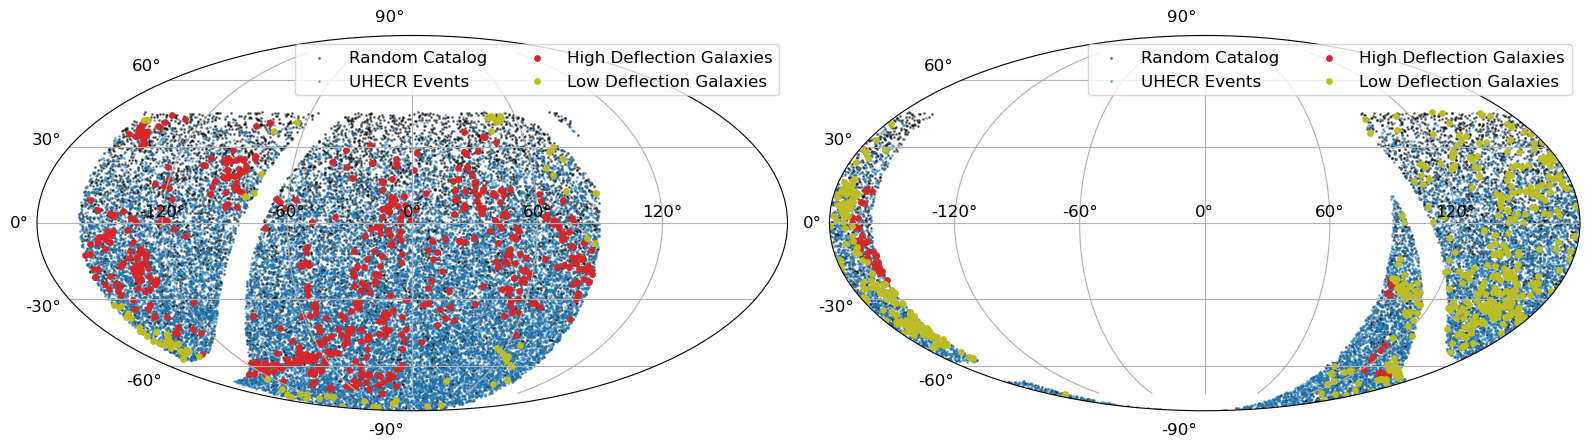

In [41]:
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
import healpy as hp
from astropy.io import ascii
import treecorr
import matplotlib.pyplot as plt
from auger_tools import generate_RandomCatalogue

# Read UHECR data
events_a8 = ascii.read('../data/Auger/events_a8_lb.dat')
eve = SkyCoord(events_a8['RA'], events_a8['dec'], frame='icrs', unit='degree')
mask_eve = np.where(abs(eve.galactic.b) > 5. * u.degree)[0]
events_a8 = events_a8[mask_eve]

# Read galaxy data
gxs = ascii.read('../data/VLS_ang5_cz_700control_def.txt')
gxs = gxs[gxs['cz'] > 1000.]
data = gxs

nmult = 10

# Generate random catalog
ra_rand, dec_rand = generate_RandomCatalogue(data['_RAJ2000'], data['_DEJ2000'], nmult=nmult)
rcat = treecorr.Catalog(ra=ra_rand, dec=dec_rand, ra_units='deg', dec_units='deg')

# Create figure with two Mollweide subplots
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': 'mollweide'}, figsize=(16, 6))

def format_axes(ax):
    """Format axes with RA in hours and Dec in degrees."""
    xticks_deg = np.arange(-120, 180, 60)
    xticks_rad = np.radians(xticks_deg)
    ax.set_xticks(xticks_rad)
    ax.set_xticklabels([f'{int(deg)}°' for deg in xticks_deg])
    yticks_deg = np.arange(-90, 91, 30)
    yticks_rad = np.radians(yticks_deg)
    ax.set_yticks(yticks_rad)
    ax.set_yticklabels([f'{deg}°' for deg in yticks_deg])
    ax.tick_params(axis='both', which='major', labelsize=12)
    #ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.grid(True)

# Function to process and mask data
def process_data(ra, dec, ra_min, ra_max):
    ra = ra.copy()
    mask = ra > 180.
    ra[mask] -= 360.
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)
    mask = (ra_rad > np.radians(ra_min)) & (ra_rad < np.radians(ra_max))
    return ra_rad, dec_rad, mask

# Parameters for the cut
ra_min, ra_max = -160, 90

# Process each dataset and compute masks
def process_dataset(ra, dec, ra_min, ra_max):
    ra_rad_orig = np.radians(ra - 360. * (ra > 180))
    dec_rad_orig = np.radians(dec)
    mask = (ra_rad_orig > np.radians(ra_min)) & (ra_rad_orig < np.radians(ra_max))
    return {
        'high': (ra_rad_orig[mask], dec_rad_orig[mask]),
        'low': (ra_rad_orig[~mask], dec_rad_orig[~mask])
    }

# Process UHECR events
ecat_data = process_dataset(events_a8['RA'], events_a8['dec'], ra_min, ra_max)

# Process random catalog
rcat_data = process_dataset(ra_rand, dec_rand, ra_min, ra_max)

# Process high and low deflection galaxies
mean_def = np.median(gxs['deflection'])
print(f"Mean deflection: {mean_def:.2f} degrees")
def_mask = gxs['deflection'] > 23.5
high_def = process_dataset(data[def_mask]['_RAJ2000'], data['_DEJ2000'][def_mask], ra_min, ra_max)
low_def = process_dataset(data['_RAJ2000'][~def_mask], data['_DEJ2000'][~def_mask], ra_min, ra_max)

# Plot high deflection region
ax1.scatter(*rcat_data['high'], s=1, color='k', alpha=.5, label='Random Catalog')
ax1.scatter(*ecat_data['high'], s=1, color='C00', alpha=.5, label='UHECR Events')
ax1.scatter(*high_def['high'], s=15, color='C03', marker='o', alpha=1, label='High Deflection Galaxies')
ax1.scatter(*low_def['high'], s=15, color='C08', marker='o', alpha=1, label='Low Deflection Galaxies')

# Plot low deflection region
ax2.scatter(*rcat_data['low'], s=1, color='k', alpha=.5, label='Random Catalog')
ax2.scatter(*ecat_data['low'], s=1, color='C00', alpha=.5, label='UHECR Events')
ax2.scatter(*high_def['low'], s=15, color='C03', marker='o', alpha=1, label='High Deflection Galaxies')
ax2.scatter(*low_def['low'], s=15, color='C08', marker='o', alpha=1, label='Low Deflection Galaxies')

# Format axes and add legends
for ax in (ax1, ax2):
    format_axes(ax)
    ax.legend(loc='upper right', fontsize=12, ncol=2)

print(f"""
Full galaxy data:
    High deflection galaxies: {len(data[def_mask])}
    Low deflection galaxies: {len(data[~def_mask])}

High deflection region:
    High deflection galaxies: {len(high_def['high'][0])}
    Low deflection galaxies: {len(low_def['high'][0])}

Low deflection region:
    High deflection galaxies: {len(high_def['low'][0])}
    Low deflection galaxies: {len(low_def['low'][0])}
""")    

plt.tight_layout()
plt.show()

In [ ]:
from auger_tools import get_xibs
from auger_tools import read_config
from scipy import integrate

# Read configuration parameters
params = read_config('cross+int.ini')
treecorr_config = {
    "min_sep": params['minsep'],
    "max_sep": params['maxsep'],
    "nbins": params['nbins'],
    "sep_units": 'degree',
    "bin_type": 'Linear',
    "brute": params['brute'],
    "metric": 'Arc'
}

# Define quantiles
if params['bin_K']=='quantiles':
    quantiles = np.quantile(data['K_abs'], np.linspace(0, 1, params['nquant'] + 1))
# Define bins
elif params['bin_K'] == 'adhoc':
    if params['nquant']==4: quantiles = np.array([-26,-24,-23.2,-22.5,-22.])
    elif params['nquant']==3: quantiles = np.array([-26,-23.2,-22.8,-22.])
else:
    raise ValueError(f"Unknown binning method: {params['bin_K']}")

# Split sample into quantiles
data = [gxs[(gxs['K_abs'] > quantiles[q]) & (gxs['K_abs'] < quantiles[q + 1])] for q in range(params['nquant'])]

xi_bs, varxi_bs = [], []
for q in range(params['nquant']):
    print(f'{q + 1}/{params["nquant"]}')
    results = get_xibs(data[q], params['nbootstrap'], params['nbins'], rcat[q], ecat, treecorr_config)
    xi_bs.append(results[0])
    varxi_bs.append(results[1])
th = results[2]

# Integration
print('Integration')
int_results = [np.zeros(params['nbootstrap']) for _ in range(params['nquant'])]
for q in range(params['nquant']):
    for i in range(params['nbootstrap']):
        int_results[q][i] = integrate.trapezoid(th * xi_bs[q][i], x=th)

mean_mag = np.array([(quantiles[i]+quantiles[i+1])/2. for i in range(len(quantiles)-1)])
int_mean = np.array([np.mean(int_results[q]) for q in range(params['nquant'])])
int_std = np.array([np.std(int_results[q],ddof=1) for q in range(params['nquant'])])